**Q2** **(a)** The required function is implemented as follows.

In [1]:
def conv(image, kernel):
    H, W, C = image.shape
    kH, kW = kernel.shape
    
    output = np.zeros((H-kH+1, W-kW+1, C))
    for i in range(H-kH+1):
        for j in range(W-kW+1):
            for k in range(C):
                output[i, j, k] = (image[i:(i+kH), j:(j+kW), k] * kernel).sum()
    return output

Images size: (512, 512, 3)


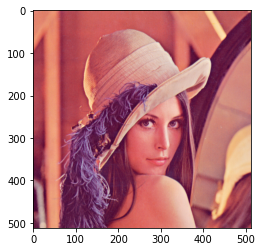

In [2]:
import matplotlib.pyplot as plt
lenna = plt.imread('lenna.png')
print('Images size:', lenna.shape)
plt.imshow(lenna)
plt.show()

(c) The result of applying the filter to the Lenna image is shown below. Note that the output has negative values and values larger than 1. The warning message indicates that `imshow` clips the values to [0, 1] before showing the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


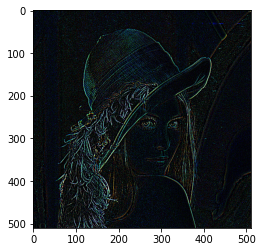

In [3]:
kernel =  np.array([[-1,  -1,  -1],
        [-1,  8,  -1],
        [-1,  -1,  -1]])
lenna1 = conv(lenna, kernel)
plt.imshow(lenna1)
plt.show()

(d) The 2D array is shown below. 1 is shown as white pixel and 0 as black. From (c) and (d), it's clear that the convolutional filter in (c) makes pixels on an edge stand out, and makes other non-edge pixels close to 0.

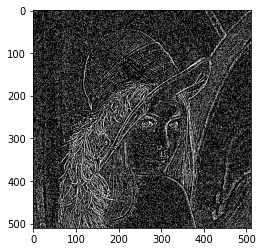

In [4]:
r, g, b = lenna1[:, :, 0], lenna1[:, :, 1], lenna1[:, :, 2]
o = (r > r.mean()) & (g > g.mean()) & (b > b.mean())
plt.imshow(o, cmap='gray')
plt.show()

**Q3** We choose the California house price dataset and the Theil-Sen estimator here. Since the Theil-Sen estimator is a randomized algorithm, we run it multiple times so as to get a more accurate picture on its performance.

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TheilSenRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

for reg in [LinearRegression(), TheilSenRegressor(random_state=42), 
            TheilSenRegressor(random_state=10), TheilSenRegressor(random_state=13)]:    
    reg.fit(X_tr, y_tr)
    pred_tr = reg.predict(X_tr)
    pred_ts = reg.predict(X_ts)
    print(reg)
    print('MSE (train):', mean_squared_error(y_tr, pred_tr))
    print('MSE (test):', mean_squared_error(y_ts, pred_ts))

LinearRegression()
MSE (train): 0.5233576288267754
MSE (test): 0.5305677824766757
TheilSenRegressor(max_subpopulation=10000, random_state=42)
MSE (train): 20.046688112298682
MSE (test): 0.8338683606671511
TheilSenRegressor(max_subpopulation=10000, random_state=10)
MSE (train): 19.92214120145456
MSE (test): 0.8719233444260637
TheilSenRegressor(max_subpopulation=10000, random_state=13)
MSE (train): 23.107951623718176
MSE (test): 1.0369502145932055


Clearly, on the California house price, OLS appears to have much better training and test set performance than the Theil-Sen estimator in general, particularly on the training set. One possible reason is that the California house price dataset possibly has few or no outliers, and the house price has a large variance given the same features in the training set. You can try several different train-test partitions of the dataset to get a more accurate idea of how Theil-Sen performs. 